## 3. 实现 Gradient Descent 算法 

通过梯度下降法，自己实现一种通用的给定数据找到 y = wx + b 中最优的 w 和 b 的程序，并用加噪音数据验证效果。

### 说明：

刚好年初买的 [Dataquest](https://www.dataquest.io/mission/121/gradient-descent/6/gradient-descent-algorithm) 会员有梯度下降的相关练习，大致扫了下，发现跟本周作业比较贴合，于是便把这个练习做了，记录下笔记和代码。

* 英文注释下的代码多为系统提示
* 无注释或中文注释多为自己写的代码

### 3.1 数据探索

pga.csv 是一个高尔夫距离(distance)和精准度(accuracy)的数据，我们先对数据做下归一化，然后画个图看看，从图形上可以看出是有一定的相关性的a

           player  distance  accuracy
0  Aaron Baddeley  0.410392 -2.281303
1     Adam Hadwin -0.224372  0.702789
2      Adam Scott  2.293166 -0.231465
3      Alex Cejka -0.751549  0.377574
4      Alex Prugh  0.528738  0.032649


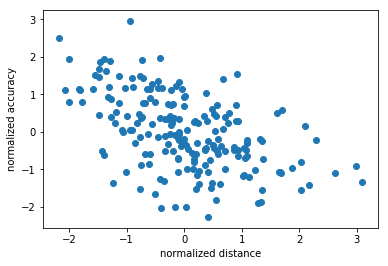

In [3]:
import pandas
import matplotlib.pyplot as plt

# Read data from csv
pga = pandas.read_csv("data/pga.csv")

# Normalize the data
pga.distance = (pga.distance - pga.distance.mean()) / pga.distance.std()
pga.accuracy = (pga.accuracy - pga.accuracy.mean()) / pga.accuracy.std()
print(pga.head())

plt.scatter(pga.distance, pga.accuracy)
plt.xlabel('normalized distance')
plt.ylabel('normalized accuracy')
plt.show()

### 3.2 估计线性模型

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np

给数据添加一个维度，因为 X variable 在 LinearRegression.fit() 里面必须是两个维度

In [4]:
print("Shape of the series:", pga.distance.shape)
print("Shape with newaxis:", pga.distance[:, np.newaxis].shape)

Shape of the series: (193,)
Shape with newaxis: (193, 1)


In [6]:
lm = LinearRegression()
lm.fit(pga.distance[:, np.newaxis], pga.accuracy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
theta1 = lm.coef_[0]

In [8]:
print(theta1)

-0.520423075644


### 3.3  代价函数

最小二乘法是一种直接最小化代数模型中的平方误差之和的方法，而这种方式对于很多数据是不合适的，因为需要庞大的内存做计算。

而梯度下降估计系数几乎可以适用于任何模型，包括线性模型。这时就需要了解代价函数，先假设我们的模型是 $h_{\theta}(x) = \theta_1x + \theta_0$，而代价函数则可以被定义为 $J(\theta_0, \theta_1) = \dfrac{1}{2m} \sum_{i=1}^m (h_{\theta}(x_i) - y_i)^2$

先照公式写一个代价函数，然后随机更新他，再画图看看

In [10]:
# The cost function of a single variable linear model
def cost(theta0, theta1, x, y):
    # Initialize cost
    J = 0
    # The number of observations
    m = len(x)
    # Loop through each observation
    for i in range(m):
        # Compute the hypothesis 
        h = theta1 * x[i] + theta0
        # Add to cost
        J += (h - y[i])**2
    # Average and normalize cost
    J /= (2*m)
    return J

# The cost for theta0=0 and theta1=1
print(cost(0, 1, pga.distance, pga.accuracy))

theta0 = 100
theta1s = np.linspace(-3,2,100)

1.51254523587


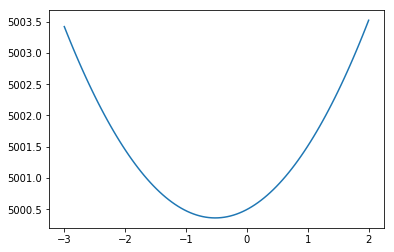

In [11]:
l = []
for theta1 in theta1s:
    l.append(cost(theta0, theta1, pga.distance, pga.accuracy))
    
plt.plot(theta1s, l)
plt.show()

上面的代价函数是二次的，就像抛物线，相对斜率的变化，我们可以看到一个全局最小值，但这里，我们只改变了斜率，截距是恒定的。

同样的，我们可以使用 3D 图来显示这个成本函数，其中 x 和 y 轴是斜率 和 截距，z 轴是代价

In [23]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

# We must create variables to represent each possible pair of points in x and y
# ie. (-10, 10), (-10, -9.8), ... (0, 0), ... ,(10, 9.8), (10,9.8)
# x and y need to be transformed to 100x100 matrices to represent these coordinates
# np.meshgrid will build a coordinate matrices of x and y

？？这里我其实没太懂，为啥 3D 图要生成 矩阵

In [24]:
X, Y = np.meshgrid(x,y)
print(X[:5,:5],"\n",Y[:5,:5])

[[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]] 
 [[-10.         -10.         -10.         -10.         -10.        ]
 [ -9.7979798   -9.7979798   -9.7979798   -9.7979798   -9.7979798 ]
 [ -9.5959596   -9.5959596   -9.5959596   -9.5959596   -9.5959596 ]
 [ -9.39393939  -9.39393939  -9.39393939  -9.39393939  -9.39393939]
 [ -9.19191919  -9.19191919  -9.19191919  -9.19191919  -9.19191919]]


[[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]] 
 [[-10.         -10.         -10.         -10.         -10.        ]
 [ -9.7979798   -9.7979798   -9.7979798   -9.7979798   -9.7979798 ]
 [ -9.5959596   -9.5959596   -9.5959596   -9.5959596   -9.5959596 ]
 [ -9.39393939  -9.39393939  -9.39393939  -9.39393939  -9.39393939]
 [ -9.19191919  -9.19191919  -9.19191919  -9.19191919  -9.19191919]]


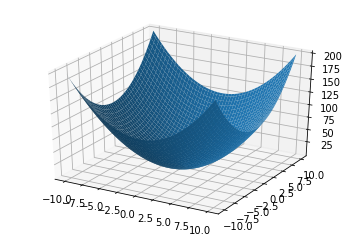

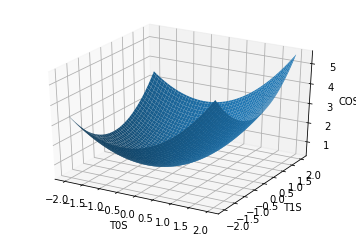

In [12]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Example of a Surface Plot using Matplotlib
# Create x an y variables
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

# We must create variables to represent each possible pair of points in x and y
# ie. (-10, 10), (-10, -9.8), ... (0, 0), ... ,(10, 9.8), (10,9.8)
# x and y need to be transformed to 100x100 matrices to represent these coordinates
# np.meshgrid will build a coordinate matrices of x and y
X, Y = np.meshgrid(x,y)
print(X[:5,:5],"\n",Y[:5,:5])

# Compute a 3D parabola 
Z = X**2 + Y**2 

# Open a figure to place the plot on
fig = plt.figure()
# Initialize 3D plot
ax = fig.gca(projection='3d')
# Plot the surface
ax.plot_surface(X=X,Y=Y,Z=Z)

plt.show()

# Use these for your excerise 
theta0s = np.linspace(-2,2,100)
theta1s = np.linspace(-2,2, 100)
COST = np.empty(shape=(100,100))
# Meshgrid for paramaters 
T0S, T1S = np.meshgrid(theta0s, theta1s)
# for each parameter combination compute the cost
for i in range(100):
    for j in range(100):
        COST[i,j] = cost(T0S[0,i], T1S[j,0], pga.distance, pga.accuracy)

# 画图倒简单，参照上面就好了
fig2 = plt.figure()
ax = fig2.gca(projection='3d')
ax.plot_surface(X=T0S,Y=T1S,Z=COST)
ax.set_xlabel('T0S')
ax.set_ylabel('T1S')
ax.set_zlabel('COST')
plt.show()

### 3.4 求梯度

梯度下降依赖于找到最大梯度的方向，其中梯度就是多变量函数的「斜率」。根据成本函数中的每个参数取偏导数，就能找到这个梯度。偏导数就是多变量函数对单个参数求斜率，即其他变量恒定，在一个参数的方向上的斜率是多少，通过公式，我们可以推导出：

$\theta_0$ 的偏导数是：

$\dfrac{\partial J(\theta_0, \theta_1)}{\partial \theta_0} = \dfrac{1}{m} \sum_{i=1}^m (h_{\theta}(x_i)-y_i)$

$\theta_1$ 的偏导数是：

$\dfrac{\partial J(\theta_1)}{\partial \theta_1} = \dfrac{1}{m} \sum_{i=1}^m (h_{\theta}(x_i)-y_i) * x_i$

在 Python 用函数表示这两个函数不难

In [15]:
def partial_cost_theta1(theta0, theta1, x, y):
    # Hypothesis
    h = theta0 + theta1*x
    # Hypothesis minus observed times x
    diff = (h - y) * x
    # Average to compute partial derivative
    partial = diff.sum() / (x.shape[0])
    return partial

partial1 = partial_cost_theta1(0, 5, pga.distance, pga.accuracy)
print("partial1 =", partial1)

partial1 = 5.49181984727


In [16]:
def partial_cost_theta0(theta0, theta1, x, y):
    # Hypothesis
    h = theta0 + theta1*x
    # Hypothesis minus observed times x
    diff = h - y
    # Average to compute partial derivative
    partial = diff.sum() / (x.shape[0])
    return partial

partial0 = partial_cost_theta0(1, 1, pga.distance, pga.accuracy)
print("partial0 =", partial0)

partial0 = 1.0


### 3.5 实现梯度下降

梯度下降的算法是：

$\theta_1 := \theta_1 - \alpha * \dfrac{\partial J(\theta_0, \theta_1)}{\partial \theta_0}$

而有了代价函数，很多就好办了，只需再定义一些参数控制模型，如学习率等，即可实现梯度下降

In [17]:
# x 是特征向量 -- distance
# y 是目标变量 -- accuracy
# alpha 是学习速率
# theta0 是初始 theta0
# theta1 是初始 theta1
def gradient_descent(x, y, alpha=0.1, theta0=0, theta1=0):
    max_epochs = 1000 # 最大迭代次数
    counter = 0      # 初始化计数器
    c = cost(theta1, theta0, pga.distance, pga.accuracy)  # 初始化 cost
    costs = [c]     # cost 不断更新
    # 设置一个收敛阀值以找到成本函数在哪里最小化了
    # 当前 cost 与前 cost 的差异小于此值时，说明参数收敛了
    convergence_thres = 0.000001  
    cprev = c + 10  # 为了第一次能运行起来
    theta0s = [theta0]
    theta1s = [theta1]

    # cost 收敛或者遇到最大迭代次数时，便停止更新
    while (np.abs(cprev - c) > convergence_thres) and (counter < max_epochs):
        cprev = c
        # Alpha 乘以偏导数即我们的更新
        update0 = alpha * partial_cost_theta0(theta0, theta1, x, y)
        update1 = alpha * partial_cost_theta1(theta0, theta1, x, y)

        # 同时更新 theta0、theta1
        theta0 -= update0
        theta1 -= update1
        
        # 储存 thetas
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        # 计算新的 cost
        c = cost(theta0, theta1, pga.distance, pga.accuracy)

        # 储存 thetas
        costs.append(c)
        counter += 1   # Count

    return {'theta0': theta0, 'theta1': theta1, "costs": costs}

print("Theta1 =", gradient_descent(pga.distance, pga.accuracy)['theta1'])

Theta1 = -0.51766262682


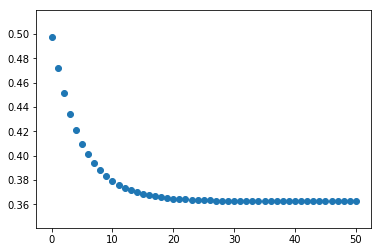

In [20]:
cost_1 = gradient_descent(pga.distance, pga.accuracy)['costs']
plt.scatter(range(len(cost_1)), cost_1)
plt.show()

从图中可以看到，学习率为 0.1 时候，梯度下降的速度是相当快的，可以降低下学习率看看

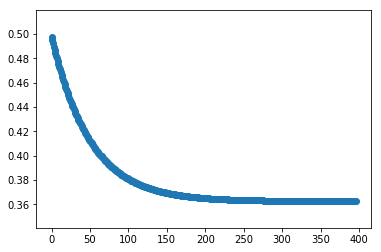

In [21]:
costs_2 = gradient_descent(pga.distance, pga.accuracy, alpha=0.01)['costs']

plt.scatter(range(len(costs_2)), costs_2)
plt.show()